In [1]:
# pip install shap

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
        classification_report, confusion_matrix, r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
) 

from sklearn.inspection import PartialDependenceDisplay, permutation_importance, partial_dependence

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.model_selection import cross_val_score

In [5]:
from category_encoders import TargetEncoder 
from sklearn.feature_selection import SelectFromModel

In [6]:
# from sklearn.datasets import make_classification

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 

In [9]:
from feature_engine.imputation import CategoricalImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

In [10]:
from xgbimputer import XGBImputer

In [11]:
import tqdm as notebook_tqdm

In [12]:
import shap

In [13]:
EDA_SnapShot = pd.read_csv('../data/Joined_APACHE4a_Tables.csv')

In [14]:
EDA_SnapShot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148532 entries, 0 to 148531
Data columns (total 98 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   patientunitstayid              148532 non-null  int64  
 1   apachepatientresultsid         148532 non-null  int64  
 2   physicianspeciality            148532 non-null  object 
 3   physicianinterventioncategory  148532 non-null  object 
 4   acutephysiologyscore           148532 non-null  int64  
 5   apachescore                    148532 non-null  int64  
 6   apacheversion                  148532 non-null  object 
 7   predictedicumortality          148532 non-null  float64
 8   actualicumortality             148532 non-null  object 
 9   predictediculos                148532 non-null  float64
 10  actualiculos                   148532 non-null  float64
 11  predictedhospitalmortality     148532 non-null  float64
 12  actualhospitalmortality       

**Goal:** Predict the rank based on the total shots.

In [15]:
EDA_SnapShot

,patientunitstayid,apachepatientresultsid,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,apacheversion,predictedicumortality,actualicumortality,predictediculos,...,creatinine-2,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
0,141168,26571,critical care medicine (CCM),Unknown,49,65,IVa,0.028889,EXPIRED,3.091127,...,2.30,9,1,-1,0,5,6,4,-1.0,-1.0
1,141194,53136,critical care medicine (CCM),Unknown,57,70,IVa,0.046448,ALIVE,4.167129,...,2.51,4,1,-1,0,4,6,3,-1.0,-1.0
2,141203,8,hospitalist,I,73,90,IVa,0.291609,ALIVE,8.670299,...,0.56,4,1,-1,0,1,3,1,51.0,100.0
3,141208,53140,hospitalist,I,17,17,IVa,0.001330,ALIVE,0.444563,...,-1.00,7,1,-1,0,5,6,3,-1.0,-1.0
4,141227,138142,internal medicine,Unknown,83,100,IVa,0.335934,ALIVE,8.209624,...,1.90,6,1,-1,0,4,6,3,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,3353235,3267489,cardiology,II,30,35,IVa,0.011009,ALIVE,1.934817,...,-1.00,8,1,-1,0,5,6,4,-1.0,-1.0
148528,3353237,3246235,pulmonary/CCM,II,37,54,IVa,0.026984,ALIVE,2.566297,...,1.07,4,1,-1,0,4,6,4,-1.0,-1.0
148529,3353251,3272802,cardiology,II,142,158,IVa,0.876797,ALIVE,8.920949,...,2.43,8,1,-1,0,1,1,1,80.0,100.0
148530,3353254,3262174,hospitalist,II,18,35,IVa,0.011004,ALIVE,2.045046,...,-1.00,4,1,-1,0,5,6,4,-1.0,-1.0


In [16]:
EDA_SnapShot['actualhospitalmortality'].value_counts()

actualhospitalmortality
ALIVE      134795
EXPIRED     13737
Name: count, dtype: int64

In [17]:
EDA_SnapShot['actualicumortality'].value_counts()

actualicumortality
ALIVE      139917
EXPIRED      8615
Name: count, dtype: int64

In [18]:
EDA_SnapShot['actualhospitalmortality'] = EDA_SnapShot['actualhospitalmortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)   

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_28878/22830545.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  EDA_SnapShot['actualhospitalmortality'] = EDA_SnapShot['actualhospitalmortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)


In [19]:
EDA_SnapShot['actualicumortality'] = EDA_SnapShot['actualicumortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)   

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_28878/1724647175.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  EDA_SnapShot['actualicumortality'] = EDA_SnapShot['actualicumortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)


In [20]:
EDA_SnapShot['gender'] = EDA_SnapShot['gender'].astype('str').replace({'0': 'Female', '1': 'Male', '-1': 'Unknown'}).astype('category') 

In [21]:
EDA_SnapShot = EDA_SnapShot.drop(['patientunitstayid',
                                    'apachepatientresultsid',
                                    'apacheversion', 
                                    'apacheapsvarid', 
                                    'intubated', 
                                    'vent', 
                                    'dialysis', 
                                    'eyes', 
                                    'motor', 
                                    'verbal', 
                                    'meds', 
                                    'urine', 
                                    'wbc', 
                                    'temperature', 
                                    'respiratoryrate', 
                                    'sodium', 
                                    'heartrate', 
                                    'meanbp', 
                                    'ph', 
                                    'hematocrit', 
                                    'creatinine', 
                                    'albumin', 
                                    'pao2', 
                                    'pco2', 
                                    'bun', 
                                    'glucose', 
                                    'bilirubin', 
                                    'fio2', 'sicuday', 
                                    'saps3day1', 
                                    'saps3today', 
                                    'saps3yesterday', 
                                    'teachtype', 
                                    'region', 
                                    'managementsystem', 
                                    'var03hspxlos',
                                    'apachepredvarid',
                                    'dischargelocation'
                                  ], 
                                 axis=1)
EDA_SnapShot


,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,actualicumortality,predictediculos,actualiculos,predictedhospitalmortality,actualhospitalmortality,...,ejectfx,creatinine-2,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
0,critical care medicine (CCM),Unknown,49,65,0.028889,True,3.091127,2.4972,0.059099,True,...,-1,2.30,1,-1,0,5,6,4,-1.0,-1.0
1,critical care medicine (CCM),Unknown,57,70,0.046448,False,4.167129,3.3423,0.102283,False,...,-1,2.51,1,-1,0,4,6,3,-1.0,-1.0
2,hospitalist,I,73,90,0.291609,False,8.670299,1.2979,0.470973,False,...,-1,0.56,1,-1,0,1,3,1,51.0,100.0
3,hospitalist,I,17,17,0.001330,False,0.444563,0.5000,0.002249,False,...,-1,-1.00,1,-1,0,5,6,3,-1.0,-1.0
4,internal medicine,Unknown,83,100,0.335934,False,8.209624,1.1472,0.488562,False,...,-1,1.90,1,-1,0,4,6,3,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,cardiology,II,30,35,0.011009,False,1.934817,0.7423,0.022630,False,...,-1,-1.00,1,-1,0,5,6,4,-1.0,-1.0
148528,pulmonary/CCM,II,37,54,0.026984,False,2.566297,0.8812,0.062568,False,...,-1,1.07,1,-1,0,4,6,4,-1.0,-1.0
148529,cardiology,II,142,158,0.876797,False,8.920949,11.2909,0.918169,False,...,-1,2.43,1,-1,0,1,1,1,80.0,100.0
148530,hospitalist,II,18,35,0.011004,False,2.045046,0.2993,0.025801,False,...,-1,-1.00,1,-1,0,5,6,4,-1.0,-1.0


In [22]:
NonNumericColumns = EDA_SnapShot.select_dtypes(exclude=[np.number]).columns.tolist()
NonNumericColumns   #including boolean column(s)

['physicianspeciality',
 'physicianinterventioncategory',
 'actualicumortality',
 'actualhospitalmortality',
 'gender',
 'admitdiagnosis']

In [23]:
EDA_SnapShot[[  'admitsource',  
                'amilocation',
                'physicianspeciality',
                'physicianinterventioncategory',
                'admitdiagnosis',
                'gender'
                ]] = EDA_SnapShot[[ 'admitsource',  
                                    'amilocation',
                                    'physicianspeciality',
                                    'physicianinterventioncategory',
                                    'admitdiagnosis',
                                    'gender'
                                    ]].astype('category')

In [24]:
EDA_SnapShot.replace(-1, np.nan, inplace=True)   
EDA_SnapShot

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_28878/3226954481.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  EDA_SnapShot.replace(-1, np.nan, inplace=True)


,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,actualicumortality,predictediculos,actualiculos,predictedhospitalmortality,actualhospitalmortality,...,ejectfx,creatinine-2,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
0,critical care medicine (CCM),Unknown,49.0,65.0,0.028889,True,3.091127,2.4972,0.059099,True,...,NaN,2.30,1,NaN,0.0,5.0,6.0,4.0,NaN,NaN
1,critical care medicine (CCM),Unknown,57.0,70.0,0.046448,False,4.167129,3.3423,0.102283,False,...,NaN,2.51,1,NaN,0.0,4.0,6.0,3.0,NaN,NaN
2,hospitalist,I,73.0,90.0,0.291609,False,8.670299,1.2979,0.470973,False,...,NaN,0.56,1,NaN,0.0,1.0,3.0,1.0,51.0,100.0
3,hospitalist,I,17.0,17.0,0.001330,False,0.444563,0.5000,0.002249,False,...,NaN,NaN,1,NaN,0.0,5.0,6.0,3.0,NaN,NaN
4,internal medicine,Unknown,83.0,100.0,0.335934,False,8.209624,1.1472,0.488562,False,...,NaN,1.90,1,NaN,0.0,4.0,6.0,3.0,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,cardiology,II,30.0,35.0,0.011009,False,1.934817,0.7423,0.022630,False,...,NaN,NaN,1,NaN,0.0,5.0,6.0,4.0,NaN,NaN
148528,pulmonary/CCM,II,37.0,54.0,0.026984,False,2.566297,0.8812,0.062568,False,...,NaN,1.07,1,NaN,0.0,4.0,6.0,4.0,NaN,NaN
148529,cardiology,II,142.0,158.0,0.876797,False,8.920949,11.2909,0.918169,False,...,NaN,2.43,1,NaN,0.0,1.0,1.0,1.0,80.0,100.0
148530,hospitalist,II,18.0,35.0,0.011004,False,2.045046,0.2993,0.025801,False,...,NaN,NaN,1,NaN,0.0,5.0,6.0,4.0,NaN,NaN


In [25]:
EDA_SnapShot[['preopmi', 
              'preopcardiaccath', 
              'ptcawithin24h', 
              'meds-2', 
              'thrombolytics', 
              'diedinhospital', 
              'aids', 
              'hepaticfailure', 
              'lymphoma', 
              'metastaticcancer', 
              'leukemia', 
              'immunosuppression', 
              'cirrhosis', 
              'electivesurgery', 
              'activetx', 
              'readmit', 
              'ima', 
              'midur', 
              'ventday1', 
              'oobventday1', 
              'oobintubday1', 
              'diabetes', 
              'day1meds'
              ]] =  EDA_SnapShot[['preopmi', 
                                    'preopcardiaccath', 
                                    'ptcawithin24h', 
                                    'meds-2', 
                                    'thrombolytics', 
                                    'diedinhospital', 
                                    'aids', 
                                    'hepaticfailure', 
                                    'lymphoma', 
                                    'metastaticcancer', 
                                    'leukemia', 
                                    'immunosuppression', 
                                    'cirrhosis', 
                                    'electivesurgery', 
                                    'activetx', 
                                    'readmit', 
                                    'ima', 
                                    'midur', 
                                    'ventday1', 
                                    'oobventday1', 
                                    'oobintubday1', 
                                    'diabetes', 
                                    'day1meds'                                            
                                    ]].astype('bool')

In [26]:
EDA_SnapShot.rename(columns={'meds-2':'meds', 
                             'verbal-2': 'verbal-gcs', 
                             'motor-2': 'motor-gcs', 
                             'eyes-2': 'eyes-gcs', 
                             'pao2-2': 'pao2', 
                             'fio2-2': 'fio2', 
                             'creatinine-2': 'creatinine', 
                             'day1verbal': 'day1verbal-gcs', 
                             'day1eyes': 'day1eyes-gcs', 
                             'day1motor': 'day1motor-gcs'
                             }, 
                    inplace=True)

In [27]:
NumericColumns = EDA_SnapShot.select_dtypes(include=[np.number]).columns.tolist()
NumericColumns #excluding boolean column(s) 

['acutephysiologyscore',
 'apachescore',
 'predictedicumortality',
 'predictediculos',
 'actualiculos',
 'predictedhospitalmortality',
 'predictedhospitallos',
 'actualhospitallos',
 'unabridgedunitlos',
 'unabridgedhosplos',
 'actualventdays',
 'predventdays',
 'unabridgedactualventdays',
 'bedcount',
 'graftcount',
 'verbal-gcs',
 'motor-gcs',
 'eyes-gcs',
 'age',
 'pao2',
 'fio2',
 'ejectfx',
 'creatinine',
 'visitnumber',
 'day1verbal-gcs',
 'day1motor-gcs',
 'day1eyes-gcs',
 'day1pao2',
 'day1fio2']

In [28]:
EDA_SnapShot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148532 entries, 0 to 148531
Data columns (total 60 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   physicianspeciality            148532 non-null  category
 1   physicianinterventioncategory  148532 non-null  category
 2   acutephysiologyscore           146696 non-null  float64 
 3   apachescore                    146696 non-null  float64 
 4   predictedicumortality          144045 non-null  float64 
 5   actualicumortality             148532 non-null  bool    
 6   predictediculos                144045 non-null  float64 
 7   actualiculos                   148532 non-null  float64 
 8   predictedhospitalmortality     136236 non-null  float64 
 9   actualhospitalmortality        148532 non-null  bool    
 10  predictedhospitallos           136236 non-null  float64 
 11  actualhospitallos              148532 non-null  float64 
 12  preopmi         

In [29]:
NonNumericColumns = EDA_SnapShot.select_dtypes(exclude=[np.number]).columns.tolist()
NonNumericColumns   #including boolean column(s)

['physicianspeciality',
 'physicianinterventioncategory',
 'actualicumortality',
 'actualhospitalmortality',
 'preopmi',
 'preopcardiaccath',
 'ptcawithin24h',
 'gender',
 'admitsource',
 'meds',
 'admitdiagnosis',
 'thrombolytics',
 'diedinhospital',
 'aids',
 'hepaticfailure',
 'lymphoma',
 'metastaticcancer',
 'leukemia',
 'immunosuppression',
 'cirrhosis',
 'electivesurgery',
 'activetx',
 'readmit',
 'ima',
 'midur',
 'ventday1',
 'oobventday1',
 'oobintubday1',
 'diabetes',
 'amilocation',
 'day1meds']

In [30]:
X = EDA_SnapShot.drop(columns = ['diedinhospital', 'actualhospitalmortality', 'actualicumortality']).head(118825) #  1st 80% of dataset for internal training and testing
y = EDA_SnapShot['diedinhospital'].head(118825)  #.astype('int')  #['actualhospitalmortality']['actualicumortality']

In [31]:
X

,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,predictediculos,actualiculos,predictedhospitalmortality,predictedhospitallos,actualhospitallos,...,ejectfx,creatinine,visitnumber,amilocation,day1meds,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2
0,critical care medicine (CCM),Unknown,49.0,65.0,0.028889,3.091127,2.4972,0.059099,6.628720,2.4972,...,NaN,2.30,1,NaN,False,5.0,6.0,4.0,NaN,NaN
1,critical care medicine (CCM),Unknown,57.0,70.0,0.046448,4.167129,3.3423,0.102283,12.978228,9.2167,...,NaN,2.51,1,NaN,False,4.0,6.0,3.0,NaN,NaN
2,hospitalist,I,73.0,90.0,0.291609,8.670299,1.2979,0.470973,16.319389,3.7493,...,NaN,0.56,1,NaN,False,1.0,3.0,1.0,51.0,100.0
3,hospitalist,I,17.0,17.0,0.001330,0.444563,0.5000,0.002249,0.521041,0.4215,...,NaN,NaN,1,NaN,False,5.0,6.0,3.0,NaN,NaN
4,internal medicine,Unknown,83.0,100.0,0.335934,8.209624,1.1472,0.488562,16.508280,1.8861,...,NaN,1.90,1,NaN,False,4.0,6.0,3.0,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118820,hospitalist,I,35.0,52.0,0.046309,2.708132,1.9798,0.121628,8.145213,4.6938,...,NaN,1.06,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118821,hospitalist,II,52.0,57.0,0.032241,6.121565,1.3187,0.074651,16.366540,2.6090,...,NaN,1.00,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118822,hospitalist,I,18.0,23.0,0.003870,1.557909,0.6076,0.006764,4.829832,0.7160,...,NaN,0.90,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118823,hospitalist,Unknown,53.0,69.0,0.073091,4.544638,7.4083,0.144655,10.762726,7.5417,...,NaN,1.48,1,NaN,False,5.0,6.0,4.0,NaN,NaN


In [32]:
y

0          True
1         False
2         False
3         False
4         False
          ...  
118820    False
118821    False
118822    False
118823    False
118824    False
Name: diedinhospital, Length: 118825, dtype: bool

In [33]:
X.describe()

,acutephysiologyscore,apachescore,predictedicumortality,predictediculos,actualiculos,predictedhospitalmortality,predictedhospitallos,actualhospitallos,unabridgedunitlos,unabridgedhosplos,...,pao2,fio2,ejectfx,creatinine,visitnumber,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2
count,117475.000000,117475.000000,1.155490e+05,115549.000000,118825.000000,109203.000000,109203.000000,118825.000000,118825.000000,118825.000000,...,26265.000000,26265.000000,2105.000000,95803.000000,118825.000000,117371.000000,117371.000000,117371.000000,26265.000000,26265.000000
mean,43.224116,55.249193,7.241851e-02,3.916336,2.958469,0.116070,10.164584,7.932683,2.958469,8.154149,...,129.756783,59.097754,50.676010,1.549578,1.068201,4.029615,5.492021,3.491868,129.756783,59.097754
std,23.272790,25.212283,1.320457e-01,2.162758,4.213053,0.162426,4.680138,8.013669,4.213053,10.612699,...,84.105098,26.353267,13.719748,1.719086,0.291075,1.531847,1.253657,0.927687,84.105098,26.353267
min,0.000000,0.000000,7.325068e-10,0.001046,0.166600,0.000447,0.043220,0.107600,0.166600,0.107600,...,15.000000,21.000000,0.000000,0.100000,1.000000,1.000000,1.000000,1.000000,15.000000,21.000000
25%,27.000000,37.000000,9.707444e-03,2.247582,0.981200,0.021939,6.934360,2.905600,0.981200,2.905600,...,76.700000,40.000000,42.000000,0.720000,1.000000,4.000000,6.000000,3.000000,76.700000,40.000000
50%,38.000000,51.000000,2.397102e-02,3.384770,1.799300,0.052786,9.502080,5.422900,1.799300,5.422900,...,102.000000,50.000000,55.000000,1.000000,1.000000,5.000000,6.000000,4.000000,102.000000,50.000000
75%,54.000000,68.000000,6.539577e-02,5.200535,3.251300,0.131339,12.480047,9.874300,3.251300,9.874300,...,151.000000,80.000000,60.000000,1.600000,1.000000,5.000000,6.000000,4.000000,151.000000,80.000000
max,198.000000,211.000000,9.746487e-01,15.079964,345.793700,0.990196,128.837248,50.000000,345.793700,731.280600,...,607.000000,100.000000,88.000000,24.950000,8.000000,5.000000,6.000000,4.000000,607.000000,100.000000


In [ ]:
categorical_cols_index_array_list = X.columns.get_indexer(['physicianspeciality',
         'physicianinterventioncategory',
        'preopmi',
        'preopcardiaccath',
        'ptcawithin24h',
        'gender',
        'admitsource',
        'meds',
        'admitdiagnosis',
        'thrombolytics',
        'aids',
        'hepaticfailure',
        'lymphoma',
        'metastaticcancer',
        'leukemia',
        'immunosuppression',
        'cirrhosis',
        'electivesurgery',
        'activetx',
        'readmit',
        'ima',
        'midur',
        'ventday1',
        'oobventday1',
        'oobintubday1',
        'diabetes',
        'amilocation',
        'day1meds'
        ])
categorical_cols_index_array_list = categorical_cols_index_array_list.tolist()  # for XGB Imputer's use in the subsequent step, if/when using XGBImputer 
categorical_cols_index_array_list

[0,
 1,
 10,
 11,
 12,
 18,
 20,
 22,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 50,
 51]

In [34]:
X

le_y = LabelEncoder()

y_fitted = le_y.fit(y)
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.001, random_state = 321, shuffle=True, stratify = y_encoded)


In [35]:
 

ct0 = ColumnTransformer(
        [('target_encoder', TargetEncoder(handle_unknown='ignore'), ['physicianspeciality',
                                                                        'physicianinterventioncategory',
                                                                        'preopmi',
                                                                        'preopcardiaccath',
                                                                        'ptcawithin24h',
                                                                        'gender',
                                                                        'admitsource',
                                                                        'meds',
                                                                        'admitdiagnosis',
                                                                        'thrombolytics',
                                                                        'aids',
                                                                        'hepaticfailure',
                                                                        'lymphoma',
                                                                        'metastaticcancer',
                                                                        'leukemia',
                                                                        'immunosuppression',
                                                                        'cirrhosis',
                                                                        'electivesurgery',
                                                                        'activetx',
                                                                        'readmit',
                                                                        'ima',
                                                                        'midur',
                                                                        'ventday1',
                                                                        'oobventday1',
                                                                        'oobintubday1',
                                                                        'diabetes',
                                                                        'amilocation',
                                                                        'day1meds'
                                                                        ]                                           
        )],
        remainder='passthrough')
        



xgbc_pipe = Pipeline(
    steps=[
        ('preprocessor0', ct0),
        ('StandardScaler', StandardScaler()),
        ('imputer', IterativeImputer(estimator = HistGradientBoostingRegressor(verbose=2, random_state=434), max_iter=1, random_state=343)),
        ('smote', SMOTE(random_state=344)),
        ('xgbc', XGBClassifier( enable_categorical=True, 
                                eval_metric='mlogloss',
                                objective = 'multi:softmax',
                                num_class = 2,
                                device = "cuda",
                                random_state = 535,
                                n_estimators = 100                         
                            )
        )
    ]
).fit(X_train, y_train) 

y_pred = xgbc_pipe.predict(X_test)  





Binning 0.048 GB of training data: 0.097 s
Binning 0.005 GB of validation data: 0.004 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.47142, val loss: 0.47065, in 0.017s
[2/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.44796, val loss: 0.44709, in 0.020s
[3/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.42836, val loss: 0.42787, in 0.017s
[4/100] 1 tree, 31 leaves, max depth = 7, train loss: 0.41242, val loss: 0.41207, in 0.016s
[5/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.39894, val loss: 0.39893, in 0.017s
[6/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.38728, val loss: 0.38759, in 0.016s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.37775, val loss: 0.37850, in 0.019s
[8/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.36955, val loss: 0.37077, in 0.016s
[9/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.36269, val loss: 0.36404, in 0.016s
[10/100] 1 tree, 31 leaves, max depth = 8, train 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/bentonwang/Library/Python/3.13/lib/python/site-packages/xgboost/training.py:183: UserWarning: [21:07:39] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


In [36]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 0.058823529411764705
RMSE: 0.24253562503633297
MAE: 0.058823529411764705
MAPE: 75690750039840.3
R2: 0.2988215488215489


In [37]:
le_y

LabelEncoder()

In [38]:
y_fitted

LabelEncoder()

In [39]:
y_encoded

array([1, 0, 0, ..., 0, 0, 0], shape=(118825,))

In [40]:
y

0          True
1         False
2         False
3         False
4         False
          ...  
118820    False
118821    False
118822    False
118823    False
118824    False
Name: diedinhospital, Length: 118825, dtype: bool

In [41]:
accuracy_score(y_test, y_pred)

0.9411764705882353

In [42]:
confusion_matrix(y_test, y_pred)

array([[106,   2],
       [  5,   6]])

In [43]:
print(classification_report(y_test, y_pred, zero_division = 0, target_names=['Lived Through Hospitalization', 'Died While in Hospital']))

                               precision    recall  f1-score   support

Lived Through Hospitalization       0.95      0.98      0.97       108
       Died While in Hospital       0.75      0.55      0.63        11

                     accuracy                           0.94       119
                    macro avg       0.85      0.76      0.80       119
                 weighted avg       0.94      0.94      0.94       119



# cv = LeaveOneOut()
scores = cross_val_score(xgbc_pipe, X_test, y_test, cv=10, scoring='recall_macro')

print('Cross Validation Macro Precision Scores:', scores)

### Ushering in fresh test data (previously held out) for a fresh round of testing 

In [44]:
X_fresh_test = EDA_SnapShot.drop(columns = ['diedinhospital', 'actualhospitalmortality', 'actualicumortality']).tail(29707) # last 20% of dataset for internal training and testing
y_fresh_test = EDA_SnapShot['diedinhospital'].tail(29707)      #.astype('int')  #['actualhospitalmortality']['actualicumortality']

In [45]:
X_fresh_test

,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,predictediculos,actualiculos,predictedhospitalmortality,predictedhospitallos,actualhospitallos,...,ejectfx,creatinine,visitnumber,amilocation,day1meds,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2
118825,unknown,Unknown,46.0,63.0,0.061442,4.486235,0.6756,0.123841,10.223023,1.6847,...,NaN,1.72,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118826,hospitalist,II,21.0,32.0,0.011040,1.889367,1.9291,0.023112,5.529413,2.8313,...,NaN,1.08,1,6,False,5.0,6.0,4.0,NaN,NaN
118827,internal medicine,II,36.0,52.0,0.019024,2.955228,0.9284,0.041788,9.337471,2.0188,...,NaN,0.65,1,NaN,False,4.0,6.0,4.0,NaN,NaN
118828,unknown,I,63.0,76.0,0.083337,4.490110,6.2722,0.156512,15.000658,11.6500,...,NaN,2.10,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118829,unknown,Unknown,23.0,23.0,0.014486,2.045163,6.2777,0.032374,5.857531,10.7597,...,NaN,0.91,1,NaN,False,5.0,6.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,cardiology,II,30.0,35.0,0.011009,1.934817,0.7423,0.022630,5.759009,2.6701,...,NaN,NaN,1,NaN,False,5.0,6.0,4.0,NaN,NaN
148528,pulmonary/CCM,II,37.0,54.0,0.026984,2.566297,0.8812,0.062568,7.565244,6.7215,...,NaN,1.07,1,NaN,False,4.0,6.0,4.0,NaN,NaN
148529,cardiology,II,142.0,158.0,0.876797,8.920949,11.2909,0.918169,11.222566,13.4056,...,NaN,2.43,1,NaN,False,1.0,1.0,1.0,80.0,100.0
148530,hospitalist,II,18.0,35.0,0.011004,2.045046,0.2993,0.025801,6.199350,4.4549,...,NaN,NaN,1,NaN,False,5.0,6.0,4.0,NaN,NaN


In [46]:
y_fresh_test

118825    False
118826    False
118827    False
118828    False
118829    False
          ...  
148527    False
148528    False
148529    False
148530    False
148531    False
Name: diedinhospital, Length: 29707, dtype: bool

In [47]:
y_fresh_pred = xgbc_pipe.predict(X_fresh_test)

In [48]:
y_fresh_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(29707,), dtype=int32)

In [49]:
y_fresh_test_encoded = le_y.transform(y_fresh_test)

In [50]:
accuracy_score(y_fresh_test_encoded, y_fresh_pred)

0.9291749419328778

In [51]:
confusion_matrix(y_fresh_test_encoded, y_fresh_pred)

array([[26056,   537],
       [ 1567,  1547]])

In [52]:
print(classification_report(y_fresh_test_encoded, y_fresh_pred, zero_division = 0, target_names=['Lived Through Hospitalization', 'Died While in Hospital'])) 

                               precision    recall  f1-score   support

Lived Through Hospitalization       0.94      0.98      0.96     26593
       Died While in Hospital       0.74      0.50      0.60      3114

                     accuracy                           0.93     29707
                    macro avg       0.84      0.74      0.78     29707
                 weighted avg       0.92      0.93      0.92     29707



In [53]:
y_fresh_test_encoded.tolist()  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [54]:
y_fresh_pred.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [55]:
print(f'MSE: {mean_squared_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'RMSE: {root_mean_squared_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'MAE: {mean_absolute_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'R2: {r2_score(y_fresh_test_encoded, y_fresh_pred)}') 

MSE: 0.07082505806712222
RMSE: 0.26612977673894783
MAE: 0.07082505806712222
MAPE: 81409533103240.22
R2: 0.245223117687274


fresh_cv = LeaveOneOut()
fresh_CV_scores = cross_val_score(xgbc_pipe, X_fresh_test, y_fresh_test_encoded, cv=10, scoring='recall_macro')

print('Cross Validation Macro Precision Scores:', fresh_CV_scores)

In [56]:
y_fresh_pred_series = pd.Series(y_fresh_pred)
y_fresh_pred_series

0        0
1        0
2        0
3        0
4        0
        ..
29702    0
29703    0
29704    0
29705    0
29706    0
Length: 29707, dtype: int32

# Top Features' Importance Quantification

In [57]:
selection = SelectFromModel(xgbc_pipe[-1], threshold=0.0001, prefit=True)

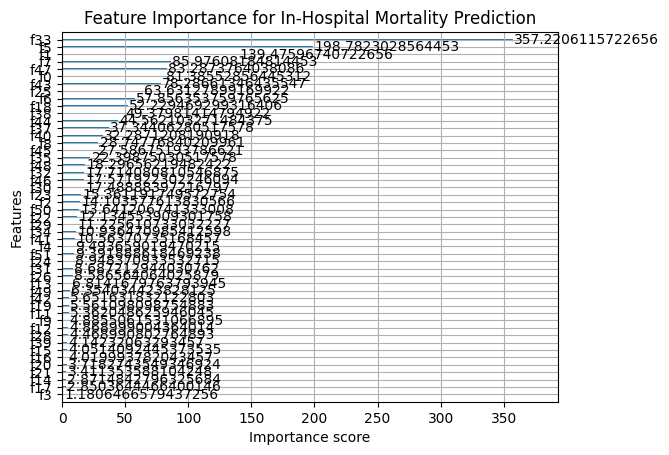

In [58]:
plot_importance_object = plot_importance(xgbc_pipe[-1], importance_type='gain')
plt.title('Feature Importance for In-Hospital Mortality Prediction')
plt.show()

In [59]:
X_feature_names = xgbc_pipe[:-2].get_feature_names_out()
X_feature_names

array(['target_encoder__physicianspeciality',
       'target_encoder__physicianinterventioncategory',
       'target_encoder__preopmi', 'target_encoder__preopcardiaccath',
       'target_encoder__ptcawithin24h', 'target_encoder__gender',
       'target_encoder__admitsource', 'target_encoder__meds',
       'target_encoder__admitdiagnosis', 'target_encoder__thrombolytics',
       'target_encoder__aids', 'target_encoder__hepaticfailure',
       'target_encoder__lymphoma', 'target_encoder__metastaticcancer',
       'target_encoder__leukemia', 'target_encoder__immunosuppression',
       'target_encoder__cirrhosis', 'target_encoder__electivesurgery',
       'target_encoder__activetx', 'target_encoder__readmit',
       'target_encoder__ima', 'target_encoder__midur',
       'target_encoder__ventday1', 'target_encoder__oobventday1',
       'target_encoder__oobintubday1', 'target_encoder__diabetes',
       'target_encoder__amilocation', 'target_encoder__day1meds',
       'remainder__acutephysiol

In [60]:
importances = xgbc_pipe[-1].feature_importances_

In [61]:
importance_df = pd.DataFrame({'Feature': X_feature_names, 'Importance': importances})   

In [62]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df = importance_df[importance_df['Importance'] > 0]

importance_df.head(99)

,Feature,Importance
33,remainder__predictedhospitalmortality,0.208317
5,target_encoder__gender,0.115922
1,target_encoder__physicianinterventioncategory,0.081337
7,target_encoder__meds,0.050138
47,remainder__pao2,0.048570
0,target_encoder__physicianspeciality,0.047461
43,remainder__verbal-gcs,0.045654
25,target_encoder__diabetes,0.037107
6,target_encoder__admitsource,0.033740
18,target_encoder__activetx,0.030458


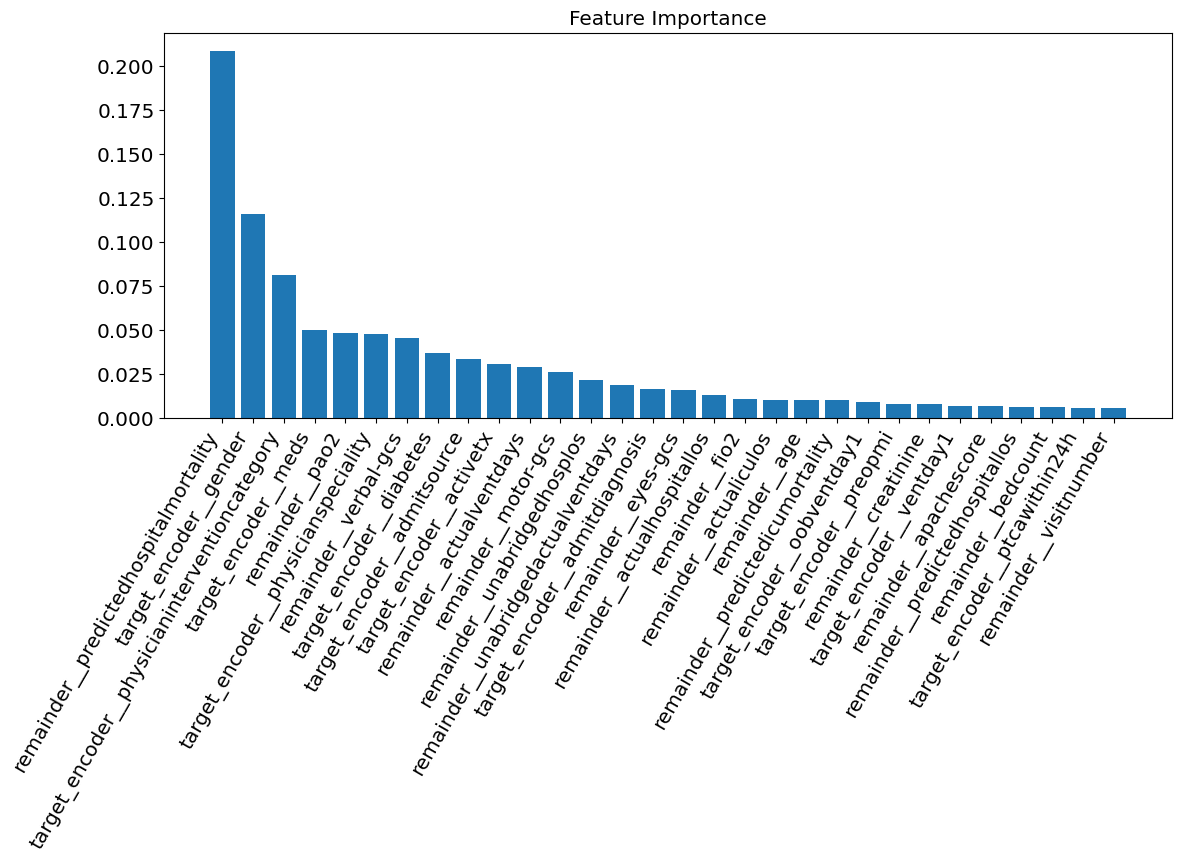

In [63]:
FeatureImportance_BarGraph = pd.DataFrame(zip(xgbc_pipe[:-2].get_feature_names_out(), xgbc_pipe[-1].feature_importances_)).sort_values(1, ascending = False).head(30) #.T
plt.figure(figsize = (13, 5))
plt.bar(FeatureImportance_BarGraph[0], FeatureImportance_BarGraph[1])
plt.xticks(rotation = 60, ha = 'right', size = 'x-large')
plt.yticks(size = 'x-large')
plt.title('Feature Importance', size = 'x-large')
plt.savefig('./visualizations/feature_importance.jpg', bbox_inches = 'tight');

# SHAP

In [64]:
xgbc_pipe_XGBClassifier = xgbc_pipe[:-2]
xgbc_pipe_XGBClassifier

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor0',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encoder',
                                                  TargetEncoder(handle_unknown='ignore'),
                                                  ['physicianspeciality',
                                                   'physicianinterventioncategory',
                                                   'preopmi',
                                                   'preopcardiaccath',
                                                   'ptcawithin24h', 'gender',
                                                   'admitsource', 'meds',
                                                   'admitdiagnosis',
                                                   'thrombolytics', 'aids',
                                                   'hepaticfailure', 'lymphoma',
                                                   'metastaticcancer',
                                                   'leukemia',
                                                   'immunosuppression',
                                                   'cirrhosis',
                                                   'electivesurgery',
                                                   'activetx', 'readmit', 'ima',
                                                   'midur', 'ventday1',
                                                   'oobventday1',
                                                   'oobintubday1', 'diabetes',
                                                   'amilocation',
                                                   'day1meds'])])),
                ('StandardScaler', StandardScaler()),
                ('imputer',
                 IterativeImputer(estimator=HistGradientBoostingRegressor(random_state=434,
                                                                          verbose=2),
                                  max_iter=1, random_state=343))])

In [65]:
X_fresh_test_transformed_SHAP = xgbc_pipe_XGBClassifier.transform(X_fresh_test)
X_fresh_test_transformed_SHAP  


array([[-7.12994373e-02, -3.93827523e-01, -5.27989322e-02, ...,
         5.47787084e-01,  1.81097754e-03, -3.93477494e-03],
       [ 1.54955696e-01,  7.31256799e-01, -5.27989322e-02, ...,
         5.47787084e-01,  1.98560624e-03, -5.44145748e-03],
       [-5.13516163e-02,  7.31256799e-01, -5.27989322e-02, ...,
         5.47787084e-01,  1.81097754e-03, -4.14217840e-03],
       ...,
       [-1.38824388e+00,  7.31256799e-01, -5.27989322e-02, ...,
        -2.68620135e+00, -5.91656409e-01,  1.55176471e+00],
       [ 1.54955696e-01,  7.31256799e-01, -5.27989322e-02, ...,
         5.47787084e-01,  1.81097754e-03, -4.19908459e-03],
       [ 1.22527962e+00,  7.31256799e-01, -5.27989322e-02, ...,
         5.47787084e-01,  1.81097754e-03, -5.15435454e-03]],
      shape=(29707, 57))

In [66]:
explainer = shap.TreeExplainer(xgbc_pipe[4])
explanation = explainer(xgbc_pipe[:-2].transform(X_fresh_test))

In [67]:
explainer.shap_values(xgbc_pipe[:-2].transform(X_fresh_test))

array([[[ 3.0316532e-01, -3.0316529e-01],
        [ 2.0033745e-01, -2.0033745e-01],
        [ 9.6179094e-05, -9.6179065e-05],
        ...,
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       [[ 2.9562020e-01, -2.9562020e-01],
        [ 9.0970635e-02, -9.0970628e-02],
        [ 2.9173918e-04, -2.9173921e-04],
        ...,
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       [[ 3.4980118e-01, -3.4980121e-01],
        [ 2.1615027e-01, -2.1615028e-01],
        [ 3.1526230e-04, -3.1526227e-04],
        ...,
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       ...,

       [[ 3.4808221e-01, -3.4808227e-01],
        [ 1.4076284e-01, -1.4076284e-01],
        [ 1.5790926e-04, -1.5790923e-04],
        ...,
        [ 0.0000000e+00,  0.0000000e+00],
     

In [68]:
explanation[:,:,1]

.values =
array([[-3.0316529e-01, -2.0033745e-01, -9.6179065e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.9562020e-01, -9.0970628e-02, -2.9173921e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.4980121e-01, -2.1615028e-01, -3.1526227e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-3.4808227e-01, -1.4076284e-01, -1.5790923e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.5700837e-01, -6.9383718e-02, -2.5749399e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.8640302e-02, -1.9166254e-01, -2.8131506e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],
      shape=(29707, 57), dtype=float32)

.base_values =
array([0.5505609, 0.5505609, 0.5505609, ..., 0.5505609, 0.5505609,
       0.5505609], shape=(29707,), dtype=float32)

.data =
array([[-7.12994373e-02, -3.93827523e-01, -5.27989322e-02, ...,
         5.47787084e-01

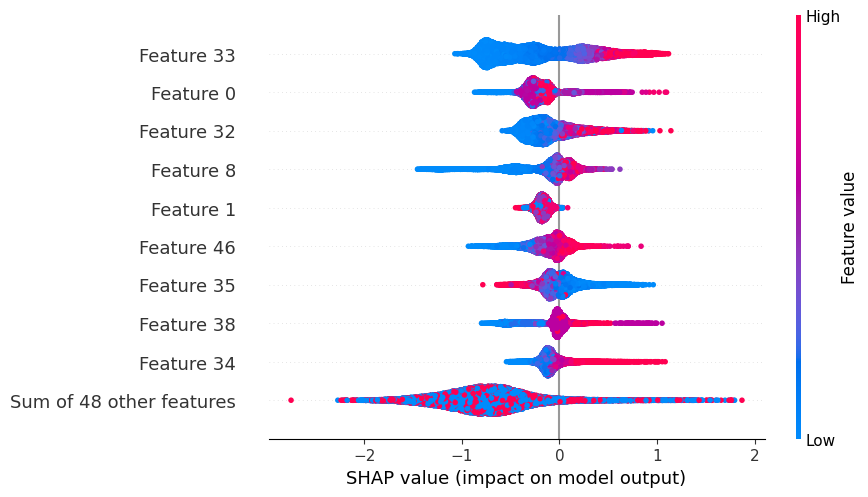

In [69]:
shap.plots.beeswarm(explanation[:,:,1])

In [76]:
xgbc_pipe[:-1].get_feature_names_out()[[33, 0, 32, 8, 1, 46, 35, 38, 34]].tolist()   # when n_estimators = 100

['remainder__predictedhospitalmortality',
 'target_encoder__physicianspeciality',
 'remainder__actualiculos',
 'target_encoder__admitdiagnosis',
 'target_encoder__physicianinterventioncategory',
 'remainder__age',
 'remainder__actualhospitallos',
 'remainder__actualventdays',
 'remainder__predictedhospitallos']

In [71]:
pd.DataFrame({'predictedhospitalmortality': X_fresh_test['predictedhospitalmortality'], 'SHAP_value':explanation[:,:,1].values[:,33]}).groupby('predictedhospitalmortality')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0]

predictedhospitalmortality
0.832380    1.118582
0.804439    1.107545
0.839378    1.084445
0.754988    1.083254
0.913323    1.078089
              ...   
0.009070   -1.013316
0.006373   -1.038656
0.009955   -1.041961
0.011088   -1.051264
0.003746   -1.072329
Name: SHAP_value, Length: 27030, dtype: float32

In [72]:
pd.DataFrame({'physicianspeciality': X_fresh_test['physicianspeciality'], 'SHAP_value':explanation[:,:,1].values[:,0]}).groupby('physicianspeciality')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0][lambda x: x > 0].head(10).plot(kind = 'bar')

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_28878/471324570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'physicianspeciality': X_fresh_test['physicianspeciality'], 'SHAP_value':explanation[:,:,1].values[:,0]}).groupby('physicianspeciality')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0][lambda x: x > 0].head(10).plot(kind = 'bar')


physicianspeciality
psychiatry                            1.018781
oncology                              0.688412
surgery-critical care                 0.424246
gastroenterology                      0.415691
ethics                                0.401254
rheumatology                          0.392726
surgery-orthopedic                    0.373705
infectious disease                    0.291028
surgery-oral                          0.161940
surgery-trauma                        0.132042
anesthesiology/CCM                    0.121372
nephrology                            0.112147
emergency medicine                   -0.026995
hematology                           -0.049211
surgery-otolaryngology head & neck   -0.063014
neurology                            -0.063582
endocrinology                        -0.084786
critical care medicine (CCM)         -0.130107
other                                -0.132284
pulmonary/CCM                        -0.153419
surgery-vascular                     -0.

In [73]:
pd.DataFrame({'actualiculos': X_fresh_test['actualiculos'], 'SHAP_value':explanation[:,:,1].values[:,32]}).groupby('actualiculos')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0]

actualiculos
14.8222    1.142354
15.1611    1.030265
29.5111    0.916150
12.9152    0.889947
13.3125    0.884922
             ...   
0.6763    -0.408369
0.6180    -0.408523
0.7597    -0.411279
0.9034    -0.411757
0.1819    -0.425277
Name: SHAP_value, Length: 9808, dtype: float32

In [74]:
pd.DataFrame({'admitdiagnosis': X_fresh_test['admitdiagnosis'], 'SHAP_value':explanation[:,:,1].values[:,8]}).groupby('admitdiagnosis')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0][lambda x: x > 0].head(10).plot(kind = 'bar')

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_28878/2116649175.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'admitdiagnosis': X_fresh_test['admitdiagnosis'], 'SHAP_value':explanation[:,:,1].values[:,8]}).groupby('admitdiagnosis')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0][lambda x: x > 0].head(10).plot(kind = 'bar')


admitdiagnosis
S-TRAUMSPI    0.532530
S-TRFACMUL    0.466780
S-REMGRAFT    0.418637
NEUTROPEN     0.363601
TRAUMPELV     0.344883
                ...   
S-TRPELSPI         NaN
S-TRSPIFAC         NaN
S-VENAFILT         NaN
STOMACHCA          NaN
THYROIDNEO         NaN
Name: SHAP_value, Length: 425, dtype: float32

In [75]:
pd.DataFrame({'LampStatus': X_fresh_test['LampStatus'], 'SHAP_value':explanation[:,:,1].values[:,2]}).groupby('LampStatus')['SHAP_value'].mean().sort_values(ascending = False) #.plot(kind = 'bar') #[lambda x: x > 0]

KeyError: 'LampStatus'

<Axes: xlabel='predictedhospitalmortality'>

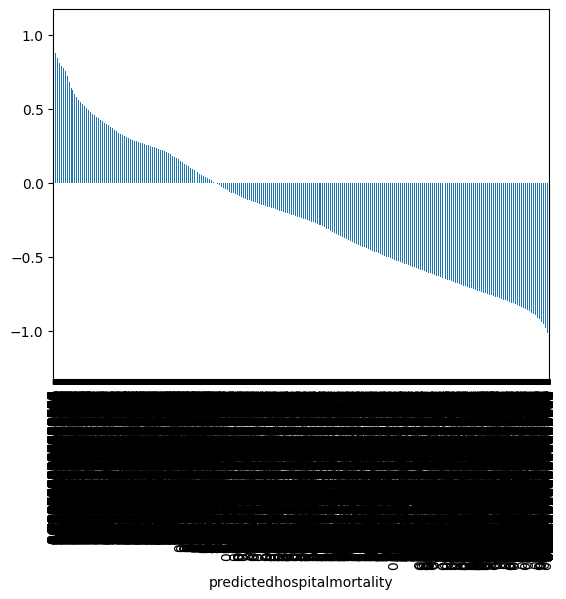

In [ ]:
pd.DataFrame({'predictedhospitalmortality': X_fresh_test['predictedhospitalmortality'], 'SHAP_value':explanation[:,:,1].values[:,33]}).groupby('predictedhospitalmortality')['SHAP_value'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [ ]:
explanation[:,:,1][0].values[0]

np.float32(0.1997289)

In [ ]:
import seaborn as sns

In [ ]:
FuelLevel_Exploration = pd.DataFrame({'FuelLevel': X_fresh_test['FuelLevel'], 'SHAP_value':explanation[:,:,1].values[:,4]})

<Axes: xlabel='FuelLevel', ylabel='SHAP_value'>

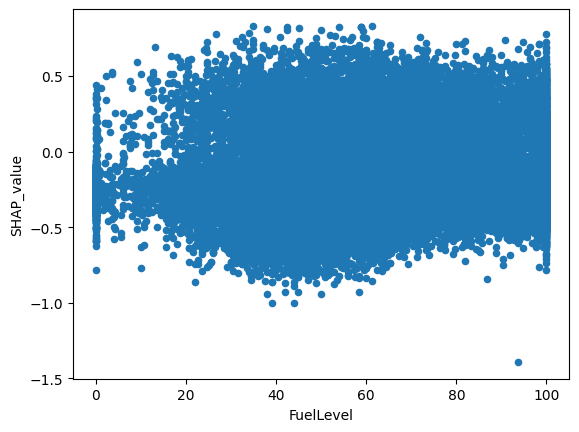

In [ ]:
pd.DataFrame({'FuelLevel': X_fresh_test['FuelLevel'], 'SHAP_value':explanation[:,:,1].values[:,4]}).plot(kind = 'scatter', x='FuelLevel', y='SHAP_value')

<Axes: xlabel='FuelLevel', ylabel='SHAP_value'>

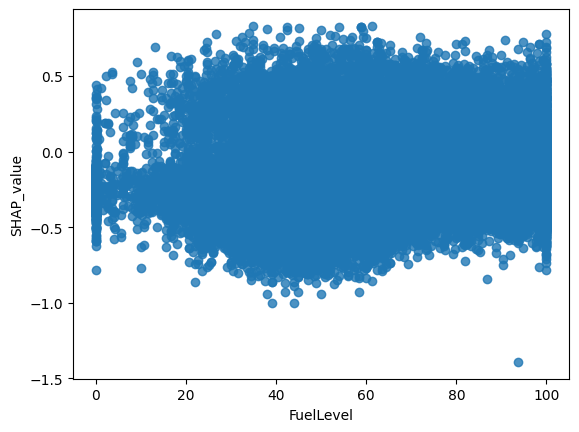

In [ ]:
sns.regplot(data = FuelLevel_Exploration, x='FuelLevel', y='SHAP_value')

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_39057/2312108474.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'ecuSource': X_fresh_test['ecuSource'], 'SHAP_value':explanation[:,:,1].values[:,1]}).groupby('ecuSource')['SHAP_value'].mean().sort_values(ascending = False).plot(kind = 'bar')


<Axes: xlabel='ecuSource'>

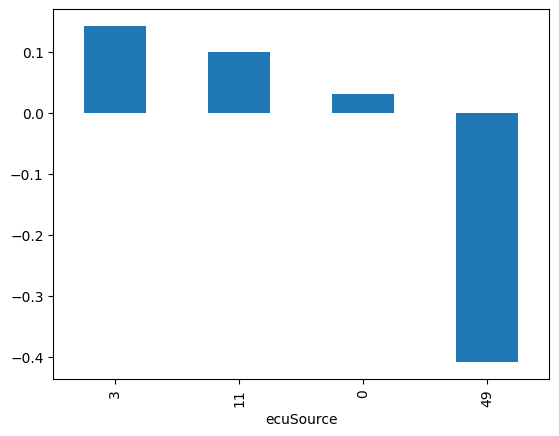

In [ ]:
pd.DataFrame({'ecuSource': X_fresh_test['ecuSource'], 'SHAP_value':explanation[:,:,1].values[:,1]}).groupby('ecuSource')['SHAP_value'].mean().sort_values(ascending = False).plot(kind = 'bar')

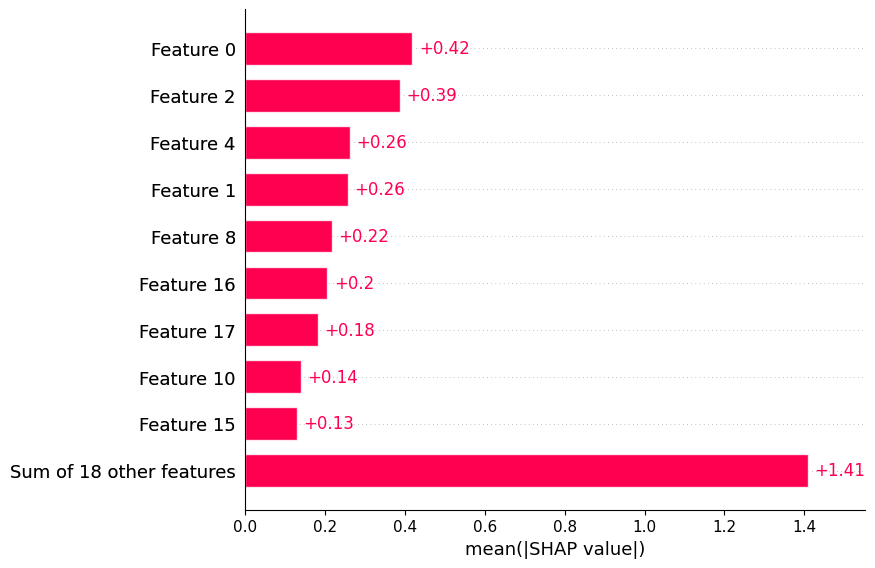

In [ ]:
shap.plots.bar(explanation[:,:,1])

feature_names = xgbc_pipe[:-1].get_feature_names_out(input_features=X_fresh_test.columns)
feature_names

df_SHAP = pd.DataFrame(X_fresh_test_transformed_SHAP, columns=feature_names)
df_SHAP

In [ ]:
xgbc_pipe[:-1].get_feature_names_out()[[0, 2, 16, 1, 8, 17, 3, 22, 7]].tolist()

['target_encoder__spn_fmi',
 'target_encoder__LampStatus',
 'remainder__FuelLevel',
 'target_encoder__ecuSource',
 'remainder__CruiseControlSetSpeed',
 'remainder__FuelLtd',
 'remainder__active',
 'remainder__ParkingBrake',
 'remainder__CruiseControlActive']

In [ ]:
xgbc_pipe[:-1].get_feature_names_out()

array(['target_encoder__spn_fmi', 'target_encoder__ecuSource',
       'target_encoder__LampStatus', 'remainder__active',
       'remainder__activeTransitionCount', 'remainder__AcceleratorPedal',
       'remainder__BarometricPressure', 'remainder__CruiseControlActive',
       'remainder__CruiseControlSetSpeed', 'remainder__DistanceLtd',
       'remainder__EngineCoolantTemperature', 'remainder__EngineLoad',
       'remainder__EngineOilPressure', 'remainder__EngineOilTemperature',
       'remainder__EngineRpm', 'remainder__EngineTimeLtd',
       'remainder__FuelLevel', 'remainder__FuelLtd',
       'remainder__FuelRate', 'remainder__FuelTemperature',
       'remainder__IgnStatus', 'remainder__IntakeManifoldTemperature',
       'remainder__ParkingBrake', 'remainder__Speed',
       'remainder__SwitchedBatteryVoltage', 'remainder__Throttle',
       'remainder__TurboBoostPressure'], dtype=object)

# Top Features' Importance Quantification

In [ ]:
selection = SelectFromModel(xgbc_pipe[4], threshold=0.0001, prefit=True)

In [ ]:
X_selected = selection.transform(X_train) # xgbc_pipe[:-1].get_feature_names_out()
X_selected

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[0, 1.0, 11, ..., 0.0, 11.02, '97_15'],
       [49, 1.0, 126, ..., 100.0, 0.29, '829_3'],
       [11, 0.0, 127, ..., nan, nan, '1068_2'],
       ...,
       [49, 0.0, 126, ..., nan, nan, '929_9'],
       [49, 0.0, 126, ..., nan, nan, '929_9'],
       [49, 1.0, 126, ..., 0.0, 0.58, '929_9']],
      shape=(948578, 27), dtype=object)

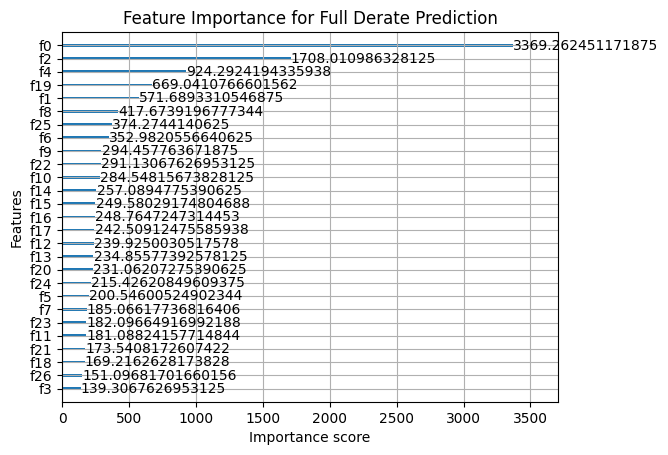

In [ ]:
plot_importance_object = plot_importance(xgbc_pipe[4], importance_type='gain')
plt.title('Feature Importance for Full Derate Prediction')
plt.show()

In [ ]:
feature_importances = xgbc_pipe[4].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': xgbc_pipe[:-1].get_feature_names_out(), 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_27_features = feature_importance_df.head(27)

print(top_27_features)

                                 Feature  Importance
0                target_encoder__spn_fmi    0.268285
2             target_encoder__LampStatus    0.136004
4       remainder__activeTransitionCount    0.073599
19            remainder__FuelTemperature    0.053274
1              target_encoder__ecuSource    0.045522
8       remainder__CruiseControlSetSpeed    0.033258
25                   remainder__Throttle    0.029802
6          remainder__BarometricPressure    0.028107
9                 remainder__DistanceLtd    0.023447
22               remainder__ParkingBrake    0.023182
10   remainder__EngineCoolantTemperature    0.022658
14                  remainder__EngineRpm    0.020471
15              remainder__EngineTimeLtd    0.019873
16                  remainder__FuelLevel    0.019808
17                    remainder__FuelLtd    0.019310
12          remainder__EngineOilPressure    0.019105
13       remainder__EngineOilTemperature    0.018701
20                  remainder__IgnStatus    0.

In [ ]:
print("Top 27 features:", top_27_features['Feature'].tolist())

Top 27 features: ['target_encoder__spn_fmi', 'target_encoder__LampStatus', 'remainder__activeTransitionCount', 'target_encoder__ecuSource', 'remainder__IgnStatus', 'remainder__EngineOilPressure', 'remainder__active', 'remainder__SwitchedBatteryVoltage', 'remainder__CruiseControlSetSpeed', 'remainder__DistanceLtd', 'remainder__FuelTemperature', 'remainder__BarometricPressure', 'remainder__EngineTimeLtd', 'remainder__FuelLtd', 'remainder__EngineCoolantTemperature', 'remainder__ParkingBrake', 'remainder__Throttle', 'remainder__Speed', 'remainder__EngineOilTemperature', 'remainder__TurboBoostPressure', 'remainder__FuelLevel', 'remainder__EngineRpm', 'remainder__EngineLoad', 'remainder__AcceleratorPedal', 'remainder__FuelRate', 'remainder__IntakeManifoldTemperature', 'remainder__CruiseControlActive']
